In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'

In [3]:
df_md_beer = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv',skiprows=1)
df_md_beer_origin = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv', nrows=0)
df_md_breweries = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', skiprows=1)
df_md_breweries_origin = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', nrows=0)
df_md_users = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', skiprows=1)
df_md_users_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', nrows=0)
df_md_users_approx = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', skiprows=1)
df_md_users_approx_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', nrows=0)

#Add suffix of original dataset to columns' name
df_md_beer.columns = df_md_beer_origin.columns + '_' + df_md_beer.columns
df_md_breweries.columns = df_md_breweries_origin.columns + '_' + df_md_breweries.columns
df_md_users.columns = df_md_users_origin.columns + '_' + df_md_users.columns
df_md_users_approx.columns = df_md_users_approx_origin.columns + '_' + df_md_users_approx.columns

#remove '.' and numbers from column's name 
pattern_number = r'[0-9]'
pattern_dot = r'[.]'
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_beer.columns})
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_beer.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_breweries.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_breweries.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users_approx.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users_approx.columns})


print('shape of all datasets: \n',
      'beer',df_md_beer.shape,'\n',
      'users_approx',df_md_users_approx.shape,'\n',
      'users',df_md_users.shape,'\n',
     'breweries',df_md_breweries.shape)

shape of all datasets: 
 beer (45640, 33) 
 users_approx (3341, 14) 
 users (3020, 13) 
 breweries (8281, 10)


In [4]:
df_md_users.head()

,ba_joined,ba_location,ba_nbr_ratings,ba_nbr_reviews,ba_user_id,ba_user_name,ba_user_name_lower,rb_joined,rb_location,rb_nbr_ratings,rb_user_id,rb_user_name,rb_user_name_lower
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro


<AxesSubplot:>

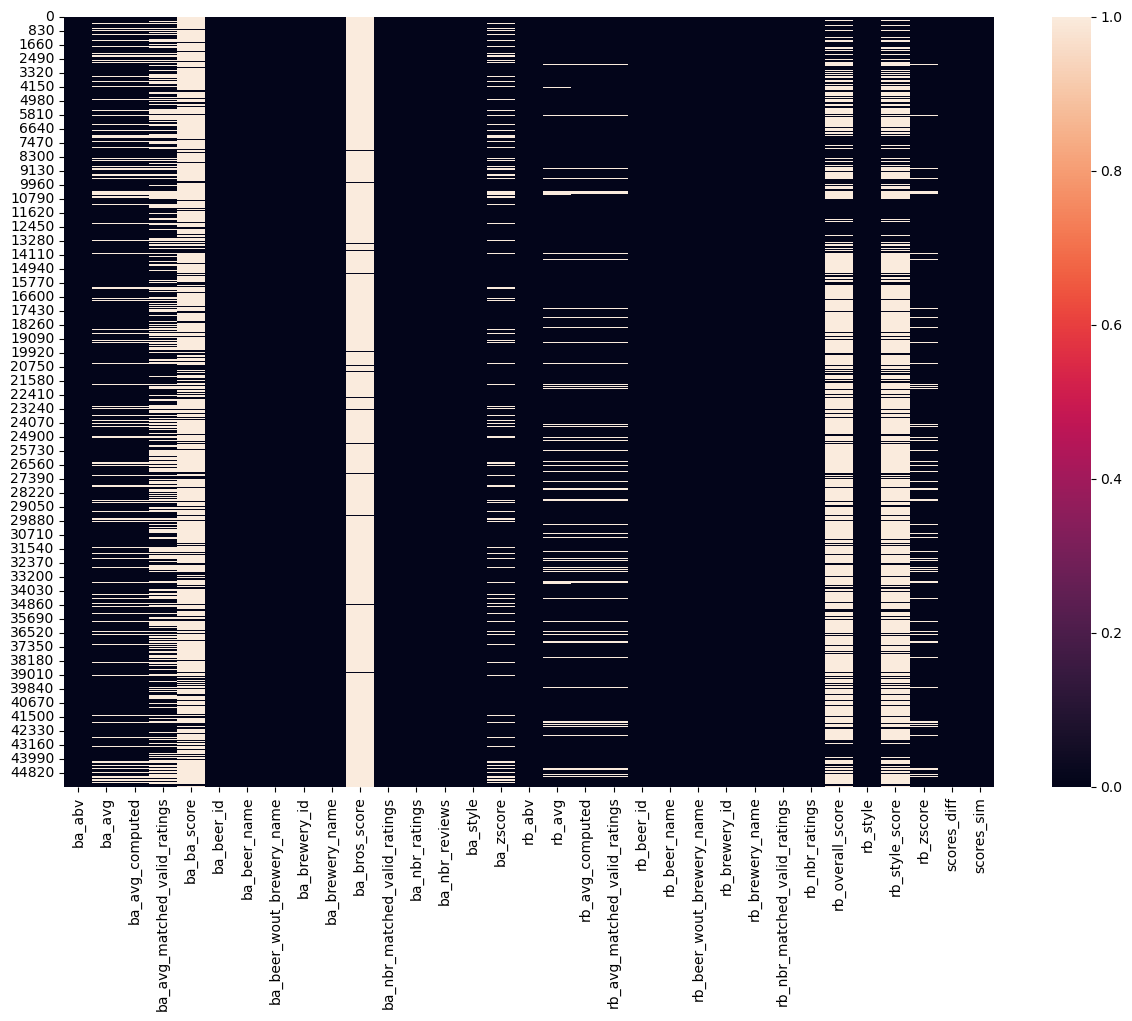

In [5]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_md_beer.isna(), cbar=True)

In [6]:
(df_md_beer.isna().sum()/df_md_beer.shape[0]).sort_values(ascending=True)

ba_abv                          0.000000
rb_style                        0.000000
rb_nbr_ratings                  0.000000
rb_nbr_matched_valid_ratings    0.000000
rb_brewery_name                 0.000000
rb_brewery_id                   0.000000
rb_beer_wout_brewery_name       0.000000
rb_beer_name                    0.000000
rb_beer_id                      0.000000
scores_diff                     0.000000
ba_style                        0.000000
ba_nbr_reviews                  0.000000
rb_abv                          0.000000
ba_nbr_matched_valid_ratings    0.000000
ba_beer_id                      0.000000
ba_nbr_ratings                  0.000000
ba_beer_wout_brewery_name       0.000000
ba_brewery_id                   0.000000
ba_beer_name                    0.000000
ba_brewery_name                 0.000000
scores_sim                      0.000000
rb_avg_matched_valid_ratings    0.074759
rb_zscore                       0.074759
rb_avg_computed                 0.074759
rb_avg          

In [7]:
df_md_breweries.head()

,ba_id,ba_location,ba_name,ba_nbr_beers,rb_id,rb_location,rb_name,rb_nbr_beers,scores_diff,scores_sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205


<AxesSubplot:>

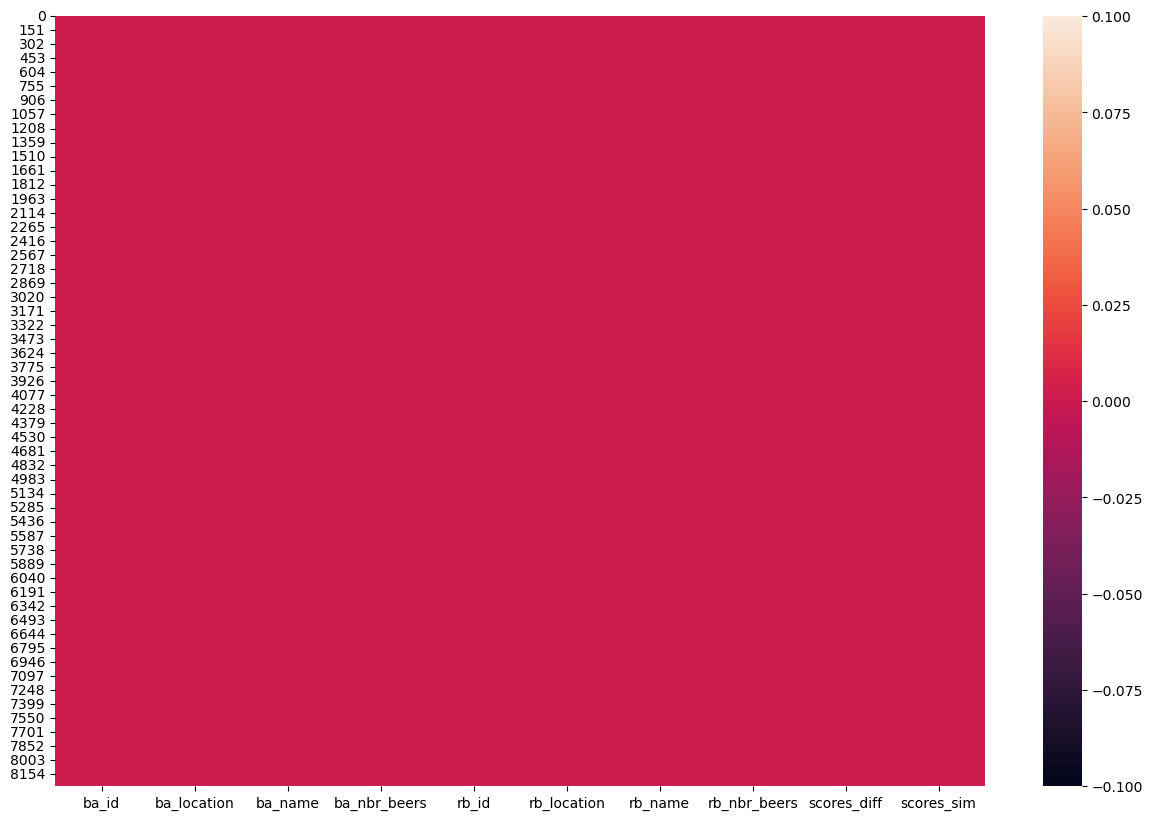

In [8]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_md_breweries.isna(), cbar=True)

In [9]:
(df_md_breweries.isna().sum()/df_md_breweries.shape[0]).sort_values(ascending=True)


ba_id           0.0
ba_location     0.0
ba_name         0.0
ba_nbr_beers    0.0
rb_id           0.0
rb_location     0.0
rb_name         0.0
rb_nbr_beers    0.0
scores_diff     0.0
scores_sim      0.0
dtype: float64

In [10]:
df_md_users.head()

,ba_joined,ba_location,ba_nbr_ratings,ba_nbr_reviews,ba_user_id,ba_user_name,ba_user_name_lower,rb_joined,rb_location,rb_nbr_ratings,rb_user_id,rb_user_name,rb_user_name_lower
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro


<AxesSubplot:>

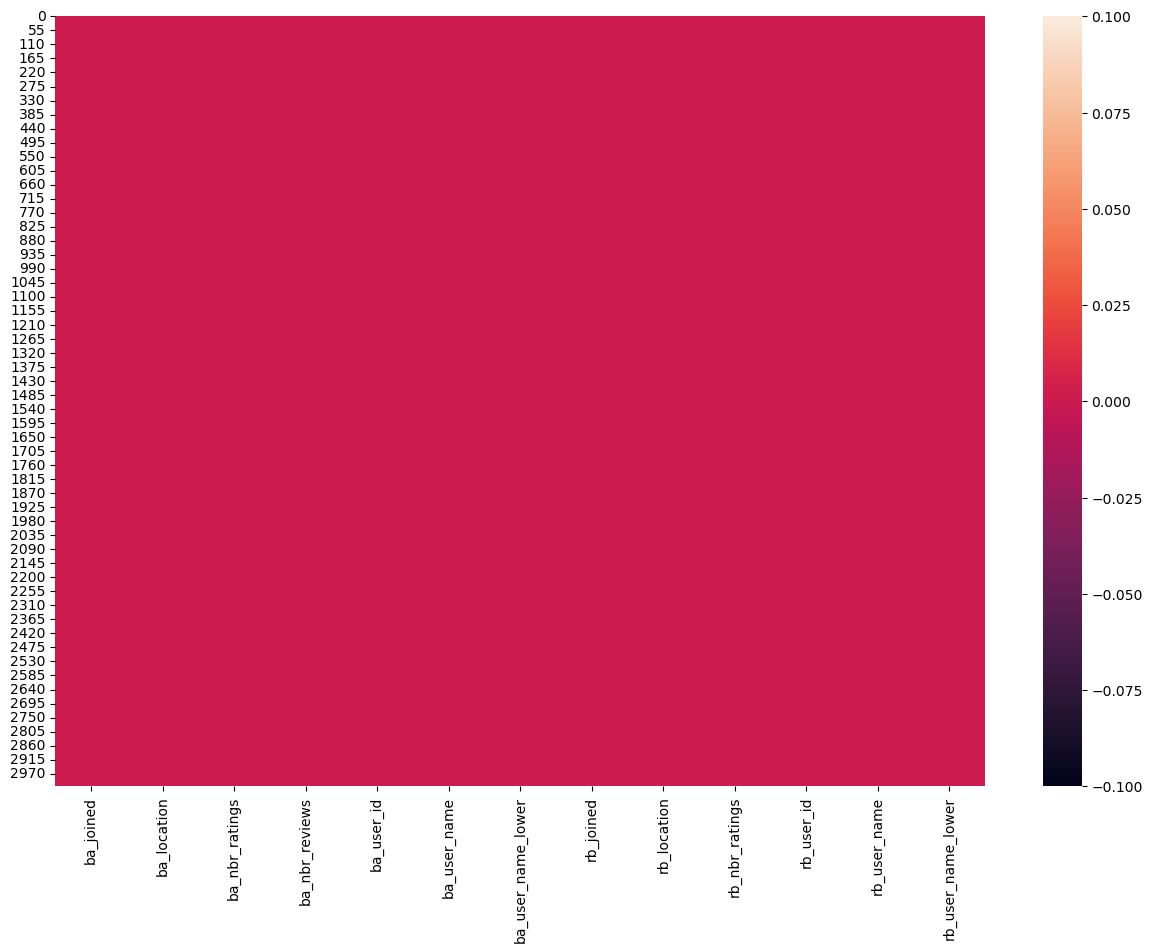

In [11]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_md_users.isna(), cbar=True)

In [12]:
(df_md_users.isna().sum()/df_md_users.shape[0]).sort_values(ascending=True)

ba_joined             0.0
ba_location           0.0
ba_nbr_ratings        0.0
ba_nbr_reviews        0.0
ba_user_id            0.0
ba_user_name          0.0
ba_user_name_lower    0.0
rb_joined             0.0
rb_location           0.0
rb_nbr_ratings        0.0
rb_user_id            0.0
rb_user_name          0.0
rb_user_name_lower    0.0
dtype: float64

In [13]:
print(df_md_users["ba_user_id"].nunique())
print(df_md_users["rb_user_id"].nunique())
#All users are unique 

3020
3020


In [14]:
#Check thst the country is the same in both dataset
sum(df_md_users["ba_location"] != df_md_users["rb_location"]) 
#yes since the similutude is of 1 in this matched dataset 

0

In [15]:
sum(df_md_users_approx["ba_location"] != df_md_users_approx["rb_location"]) 
#same even in dataset approx

0

In [16]:
#number of countries the users come from
df_md_users["ba_location"].nunique()

110

In [17]:
location_md_users=df_md_users["ba_location"].value_counts()
#5 locations with the most users 
location_md_users.head()

United States, California      254
Canada                         171
United States, Pennsylvania    169
United States, Illinois        158
United States, New York        136
Name: ba_location, dtype: int64

In [18]:
#number of location in United States
i=0
for location in location_md_users.index.tolist():
    if "United States" in location:
        i+=1
print(i)
#All the states are in there

50


Text(0, 0.5, 'Number of reviews')

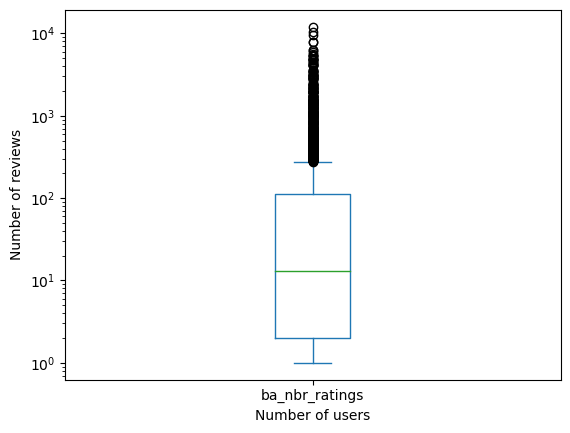

In [19]:
df_md_users['ba_nbr_ratings'].plot(kind="box",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

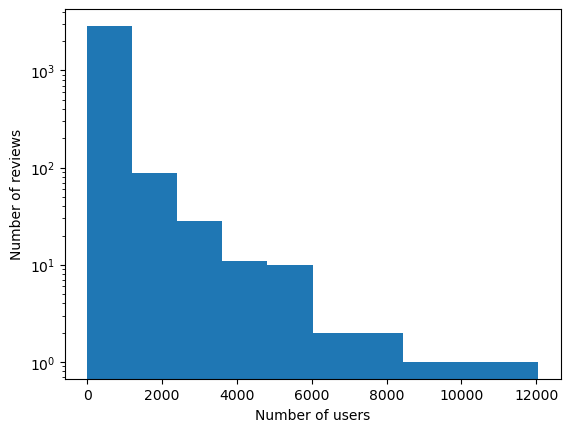

In [20]:
df_md_users['ba_nbr_ratings'].plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

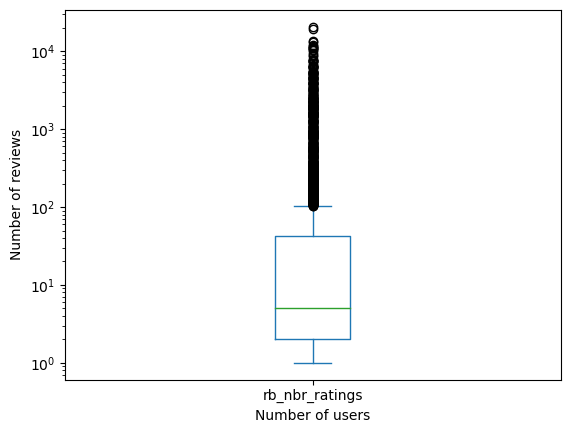

In [21]:
df_md_users['rb_nbr_ratings'].plot(kind="box",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

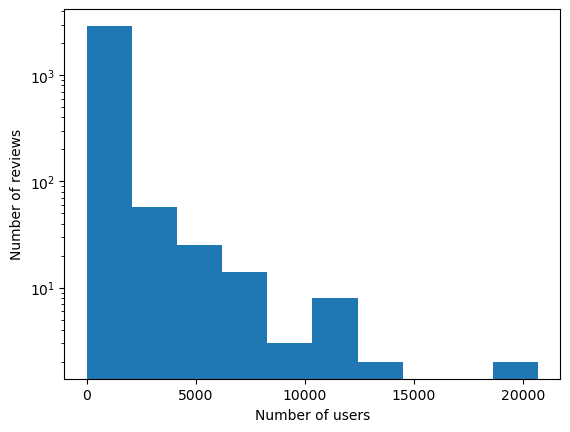

In [22]:
df_md_users['rb_nbr_ratings'].plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

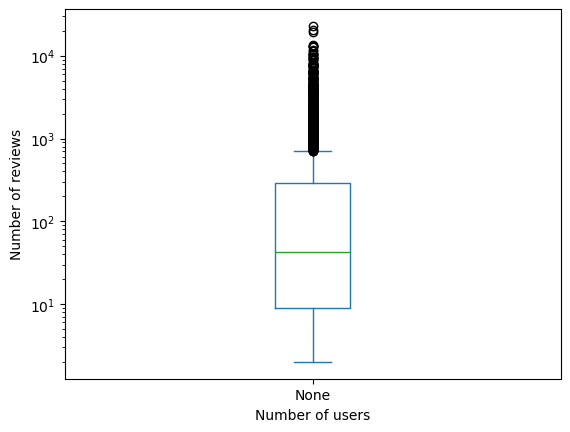

In [23]:
#sum of ratings from the two dataset
(df_md_users['rb_nbr_ratings'] + df_md_users['ba_nbr_ratings']).plot(kind="box",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

Text(0, 0.5, 'Number of reviews')

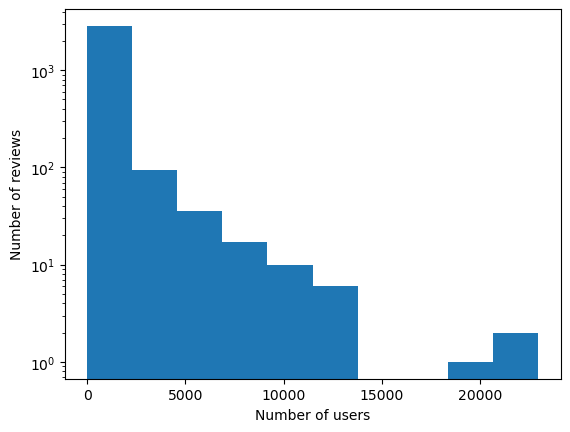

In [24]:
#sum of ratings from the two dataset
(df_md_users['rb_nbr_ratings'] + df_md_users['ba_nbr_ratings']).plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

In [25]:
df_md_users["ba_nbr_ratings"].describe()

count     3020.000000
mean       219.901656
std        712.112891
min          1.000000
25%          2.000000
50%         13.000000
75%        112.000000
max      12046.000000
Name: ba_nbr_ratings, dtype: float64

In [26]:
df_md_users["rb_nbr_ratings"].describe()

count     3020.000000
mean       285.697682
std       1186.459670
min          1.000000
25%          2.000000
50%          5.000000
75%         42.000000
max      20678.000000
Name: rb_nbr_ratings, dtype: float64

In [27]:
(df_md_users["ba_nbr_ratings"]+df_md_users["rb_nbr_ratings"]).describe()

count     3020.000000
mean       505.599338
std       1480.036524
min          2.000000
25%          9.000000
50%         42.000000
75%        288.000000
max      22947.000000
dtype: float64

In [28]:
#We examine the number of ratings cumulated on the two dataset
#user10 is the number of users having written <10 reviews
#userx_y is the number of users having written x<= nb_reviews < y 
#user10000 is the number of users having written >= 10000 reviews
user10=((df_md_users["ba_nbr_ratings"]+df_md_users["rb_nbr_ratings"])<10).sum()
user10_100=((df_md_users["ba_nbr_ratings"]+df_md_users["rb_nbr_ratings"])<100).sum()-user10
user100_1000=((df_md_users["ba_nbr_ratings"]+df_md_users["rb_nbr_ratings"])<1000).sum()-user10-user10_100
user1000_10000=((df_md_users["ba_nbr_ratings"]+df_md_users["rb_nbr_ratings"])<10000).sum()-user10-user10_100-user100_1000
user10000=((df_md_users["ba_nbr_ratings"]+df_md_users["rb_nbr_ratings"])>=10000).sum()

print('Number of users with less than 10 reviews: {} '.format(user10))
print('Number of users having written between 10 and 100 reviews: {} '.format(user10_100))
print('Number of users having written between 100 and 1000 reviews: {} '.format(user100_1000))
print('Number of users having written between 1000 and 10000 reviews: {} '.format(user1000_10000))
print('Number of users having written more than 10000 reviews: {} '.format(user10000))

#sanity check

user10+user10_100+user100_1000+user1000_10000+user10000==df_md_users.shape[0]



Number of users with less than 10 reviews: 792 
Number of users having written between 10 and 100 reviews: 1049 
Number of users having written between 100 and 1000 reviews: 822 
Number of users having written between 1000 and 10000 reviews: 342 
Number of users having written more than 10000 reviews: 15 


True

In [29]:
df_md_breweries.head()

,ba_id,ba_location,ba_name,ba_nbr_beers,rb_id,rb_location,rb_name,rb_nbr_beers,scores_diff,scores_sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205


In [30]:
df_md_breweries["scores_sim"].describe()

count    8281.000000
mean        0.971227
std         0.049393
min         0.800209
25%         0.955910
50%         1.000000
75%         1.000000
max         1.000000
Name: scores_sim, dtype: float64

In [31]:
print(sum(df_md_breweries["ba_location"] != df_md_breweries["rb_location"]))
del df_md_breweries["rb_location"]
df_md_breweries.rename(columns = {'ba_location':'location'}, inplace = True)
df_md_breweries.head()

0


,ba_id,location,ba_name,ba_nbr_beers,rb_id,rb_name,rb_nbr_beers,scores_diff,scores_sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Barrahooley Craft Brewery,4,0.602544,0.896205
